In [23]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [11]:
df_jobs = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': [
        'Data Scientist',
        'Data Analyst',
        'Machine Learning Engineer',
        'Business Intelligence Analyst',
        'Data Engineer'
    ],
    'company_name': [
        'Google',
        'Microsoft',
        'Amazon',
        'Netflix',
        'Meta'
    ],
    'job_location': [
        'Mountain View, CA',
        'Redmond, WA',
        'Seattle, WA',
        'Los Gatos, CA',
        'Menlo Park, CA'
    ]
}


In [12]:
df_jobs = pd.DataFrame(df_jobs)

In [13]:
df_jobs 


,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Data Analyst,Microsoft,"Redmond, WA"
2,3,Machine Learning Engineer,Amazon,"Seattle, WA"
3,4,Business Intelligence Analyst,Netflix,"Los Gatos, CA"
4,5,Data Engineer,Meta,"Menlo Park, CA"


In [19]:
df_companies = {
    'company_name': [
        'Google',
        'Microsoft',
        'Amazon',
        'Netflix',
        'Meta'
    ],
    'industry': [
        'Technology',
        'Technology',
        'E-commerce',
        'Entertainment',
        'Social Media'
    ],
    'company_size': [
        '100000+',
        '100000+',
        '100000+',
        '75000+',
        '200000+'
    ]
}

In [20]:
df_companies = pd.DataFrame(df_companies)   

In [21]:
df_companies

,company_name,industry,company_size
0,Google,Technology,100000+
1,Microsoft,Technology,100000+
2,Amazon,E-commerce,100000+
3,Netflix,Entertainment,75000+
4,Meta,Social Media,200000+


In [22]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,100000+
1,2,Data Analyst,Microsoft,"Redmond, WA",Technology,100000+
2,3,Machine Learning Engineer,Amazon,"Seattle, WA",E-commerce,100000+
3,4,Business Intelligence Analyst,Netflix,"Los Gatos, CA",Entertainment,75000+
4,5,Data Engineer,Meta,"Menlo Park, CA",Social Media,200000+


In [26]:
df_usa = df[df['job_country'] == 'United States'].copy()
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')
df_usa_pivot = df_usa.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size',
)
df_usa_pivot = df_usa_pivot.reset_index()
df_usa_pivot['job_posted_month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

df_usa_pivot = df_usa_pivot.sort_values('job_posted_month_no')
df_usa_pivot = df_usa_pivot.set_index('job_posted_month')
df_usa_pivot = df_usa_pivot.drop(columns='job_posted_month_no') 

df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [30]:
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col="job_posted_month")

In [32]:
df_merged = df_usa_pivot.merge(df_us_software_pivot, on='job_posted_month')

In [45]:
top_5 = (
    df_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index #Get the index of top 5
    .tolist()
    )

In [46]:
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

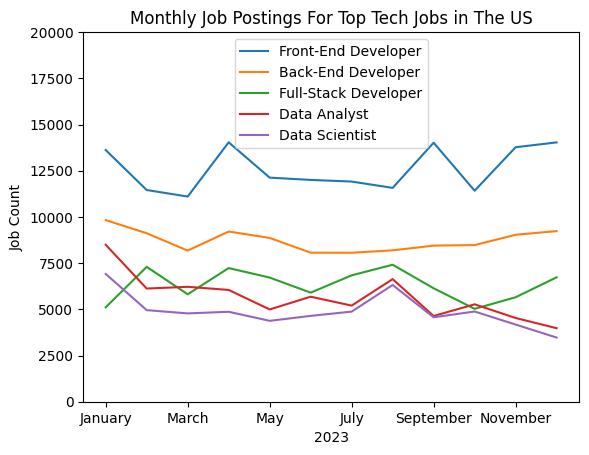

In [50]:
df_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings For Top Tech Jobs in The US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()